In [2]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# checking for null values

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

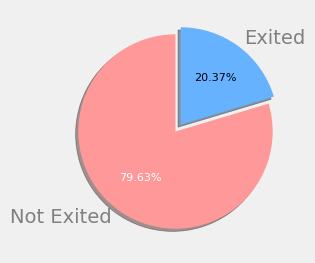

In [7]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and Exited is a column in it
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

# Specify colors for each segment
colors = ['#FF9999', '#66B2FF']  # Custom colors for "Not Exited" and "Exited" segments

fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
explode = (0, 0.09)

# Use the colors parameter to set custom colors
patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,
                                   startangle=90, explode=explode, colors=colors)

plt.setp(texts, color='grey')
plt.setp(autotexts, size=8, color='white')
autotexts[1].set_color('black')
plt.show()

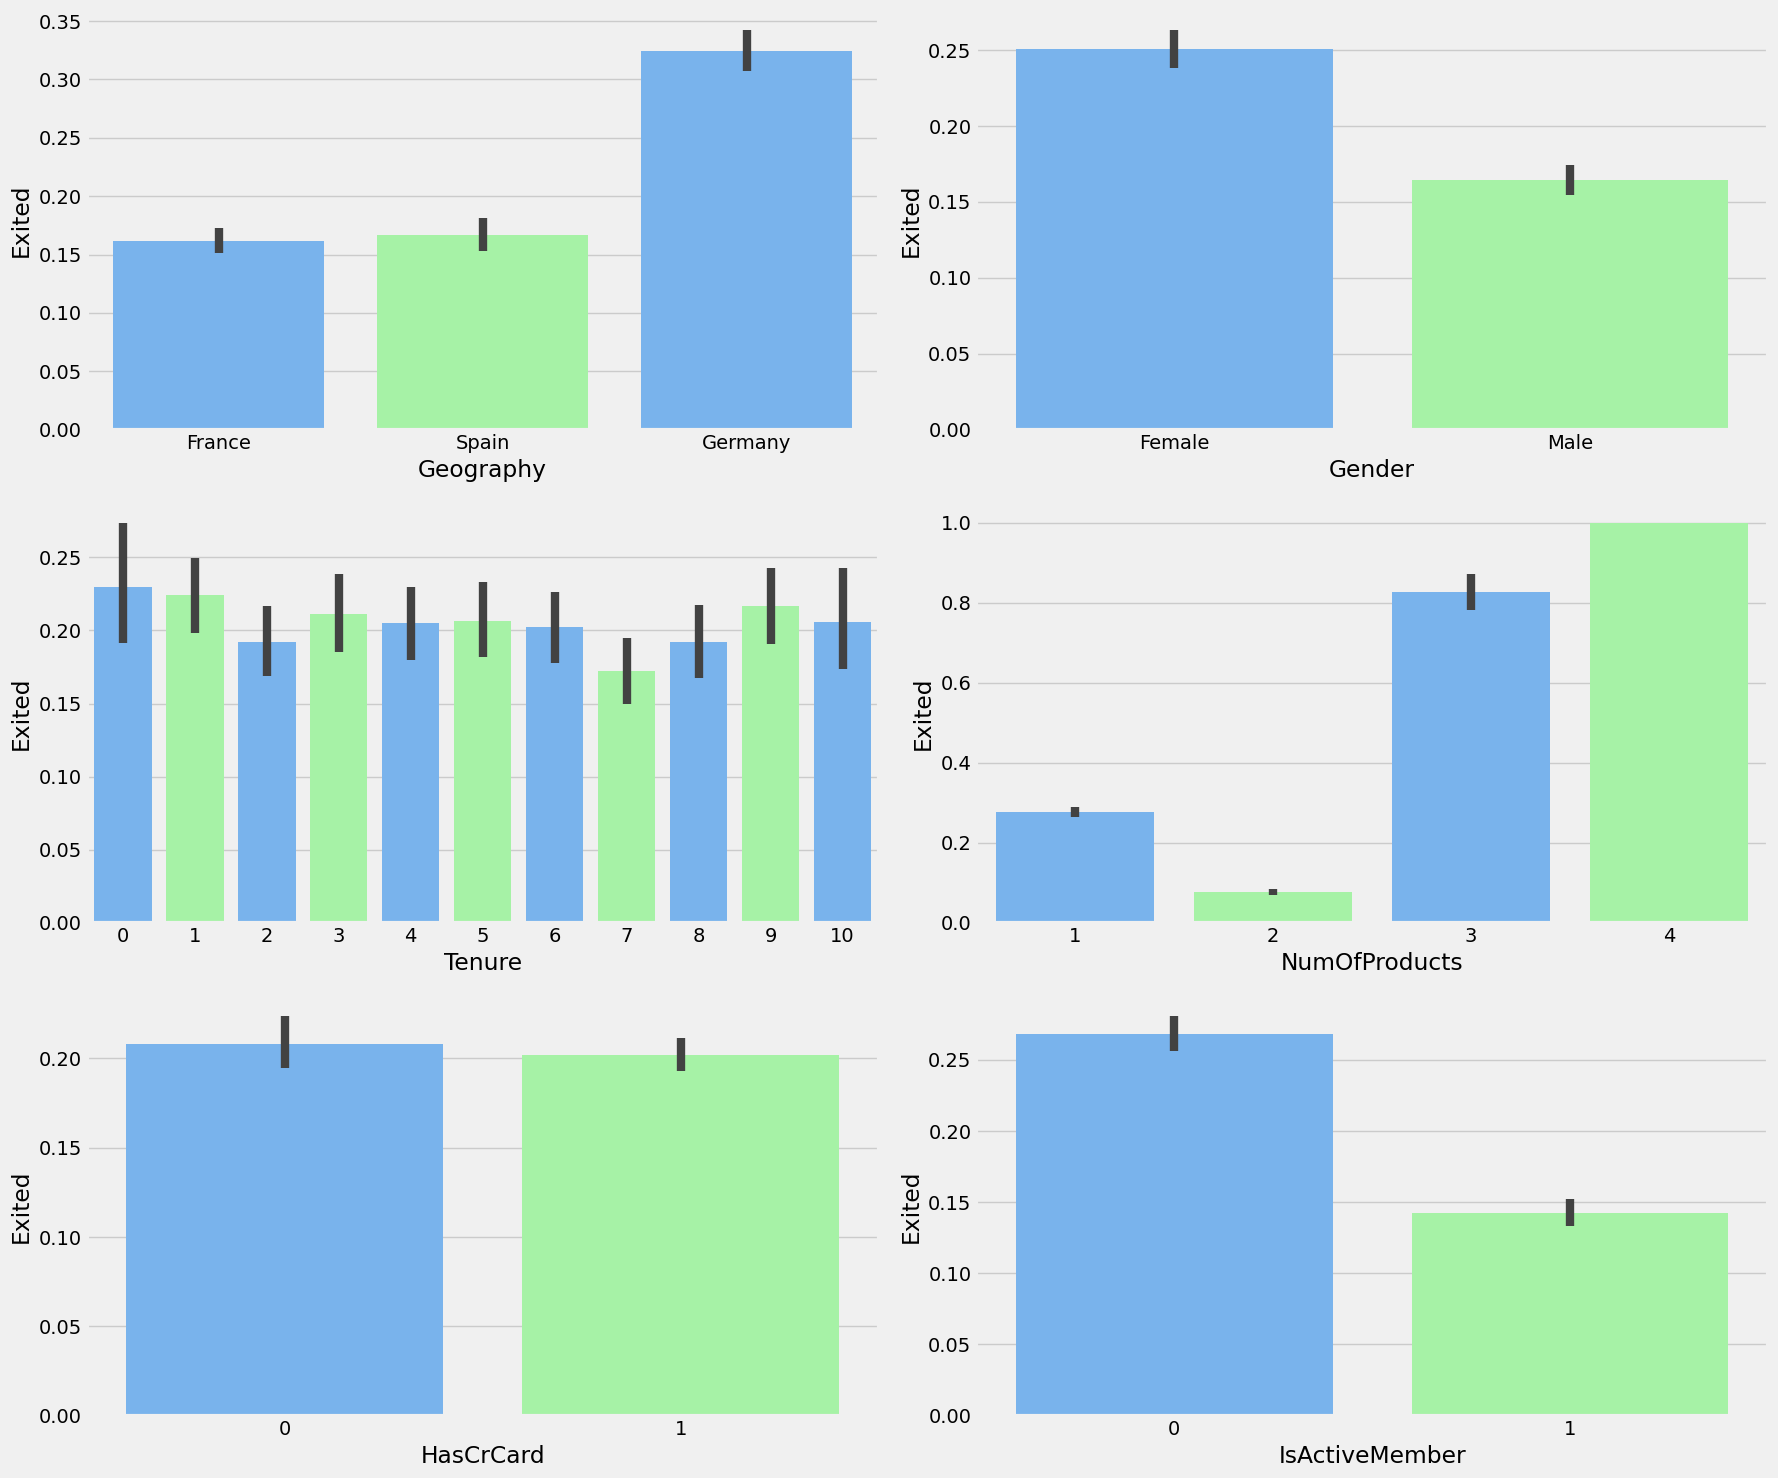

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(3, 2, figsize=(18, 15))

# Set custom colors
colors = ['#66b3ff', '#99ff99']  # You can customize these colors

# Plotting different types of graphs with custom colors
sns.barplot(x='Geography', y='Exited', data=df, ax=ax[0][0], palette=colors)
sns.barplot(x='Gender', y='Exited', data=df, ax=ax[0][1], palette=colors)
sns.barplot(x='Tenure', y='Exited', data=df, ax=ax[1][0], palette=colors)
sns.barplot(x='NumOfProducts', y='Exited', data=df, ax=ax[1][1], palette=colors)
sns.barplot(x='HasCrCard', y='Exited', data=df, ax=ax[2][0], palette=colors)
sns.barplot(x='IsActiveMember', y='Exited', data=df, ax=ax[2][1], palette=colors)

# You can customize the layout further if needed
plt.tight_layout()
plt.show()


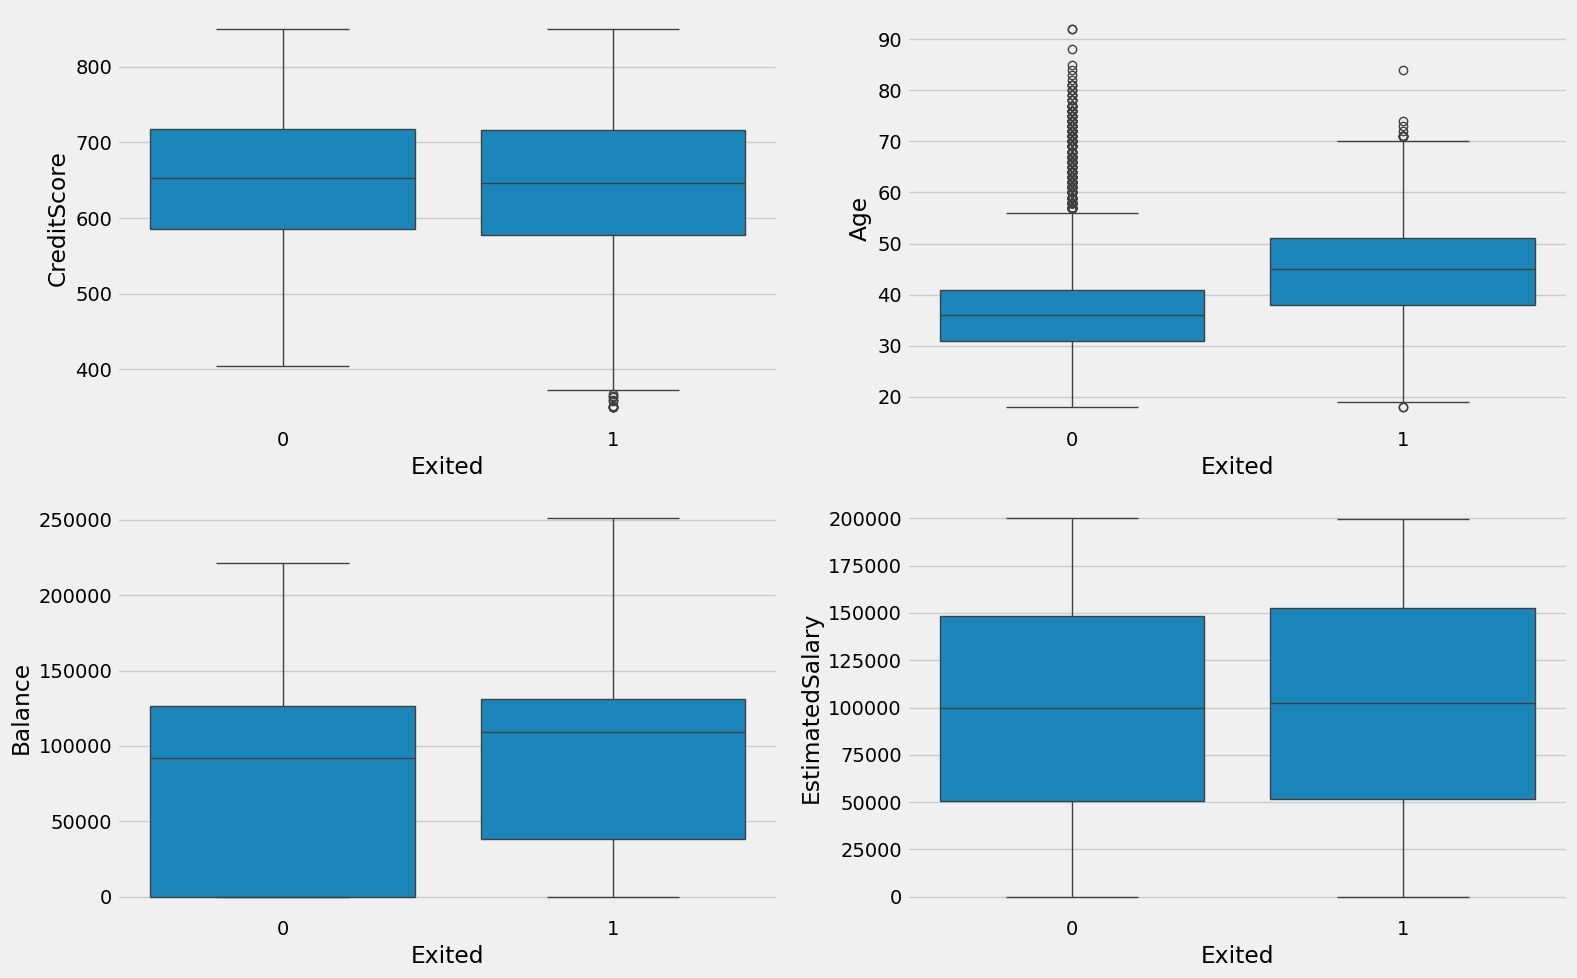

In [9]:
# visualizing continuous variables

fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

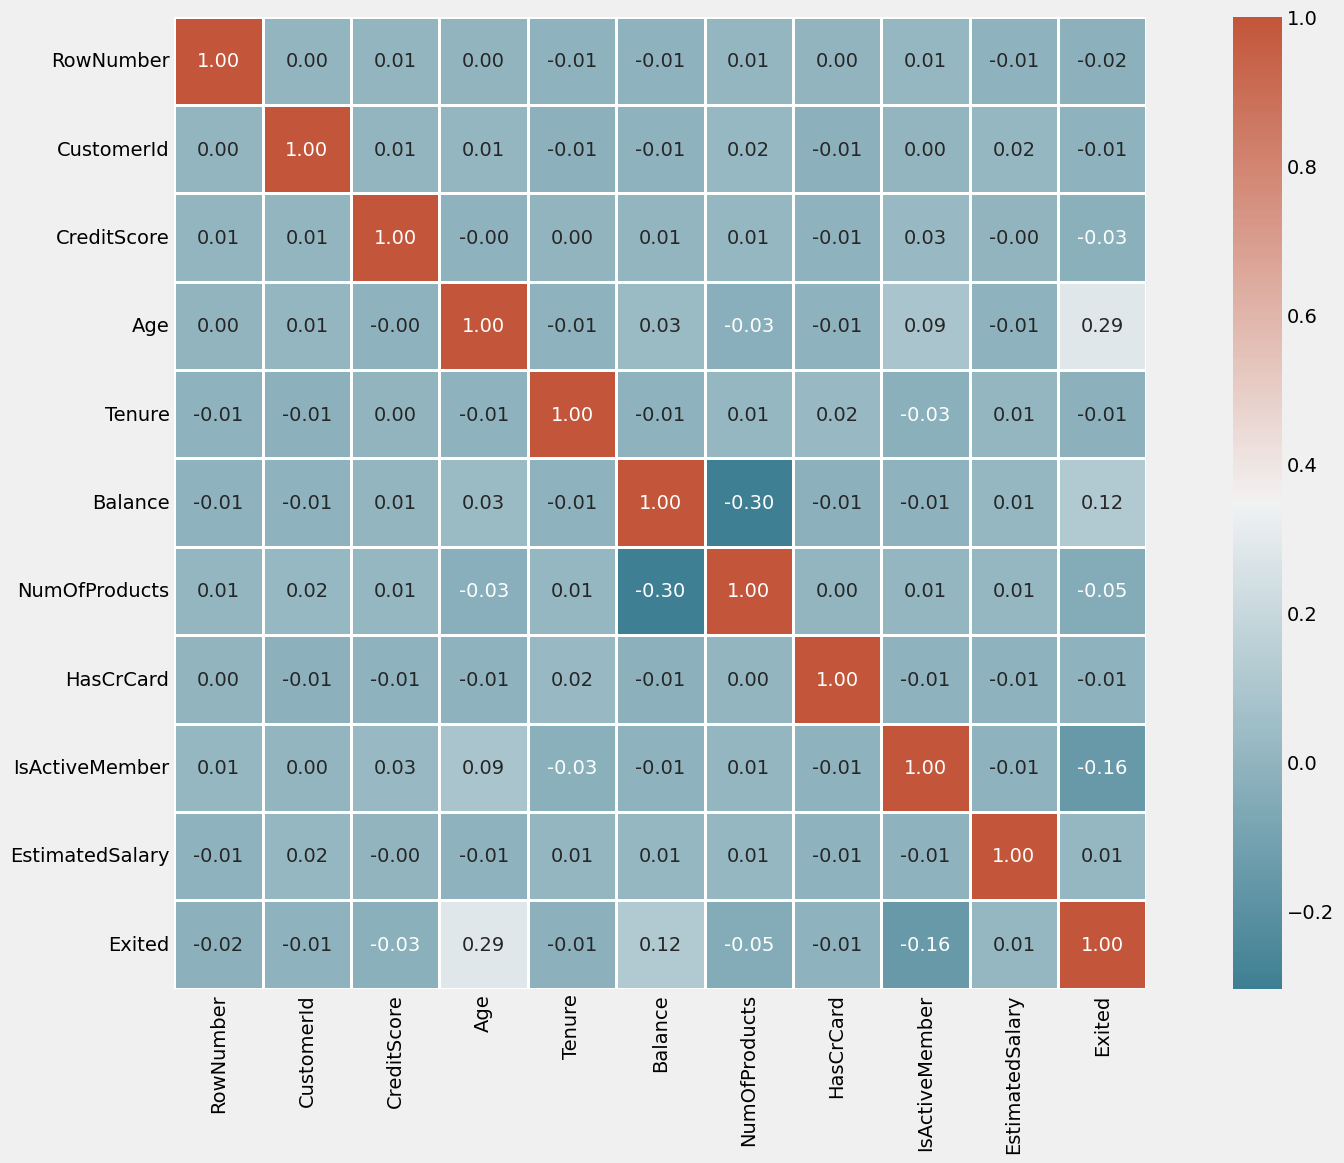

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))

# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_columns].corr()

# Set custom colors and use a diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(corr, linewidths=1, annot=True, fmt=".2f", cmap=cmap, square=True)

# You can customize the layout further if needed
plt.show()


In [11]:
# dropping uswanted columns

df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
# Encoding categorical variables

df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# creating features and label
from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis=1)
y = to_categorical(df.Exited)

# Assuming you're using TensorFlow 2.x
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy


In [16]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [17]:
# Scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the third hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set

model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)



Epoch 1/100


235/235 [==============================] - 2s 4ms/step - loss: 0.6115 - accuracy: 0.7204 - val_loss: 0.5403 - val_accuracy: 0.7912
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.8173 - val_loss: 0.4283 - val_accuracy: 0.8024
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3989 - accuracy: 0.8384 - val_loss: 0.3775 - val_accuracy: 0.8464
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3935 - accuracy: 0.8376 - val_loss: 0.3662 - val_accuracy: 0.8528
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3873 - accuracy: 0.8409 - val_loss: 0.3545 - val_accuracy: 0.8556
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8397 - val_loss: 0.3522 - val_accuracy: 0.8552
Epoch 7/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3820 - accuracy: 0.8428 - val_loss: 0.3507 - val_accuracy: 0.

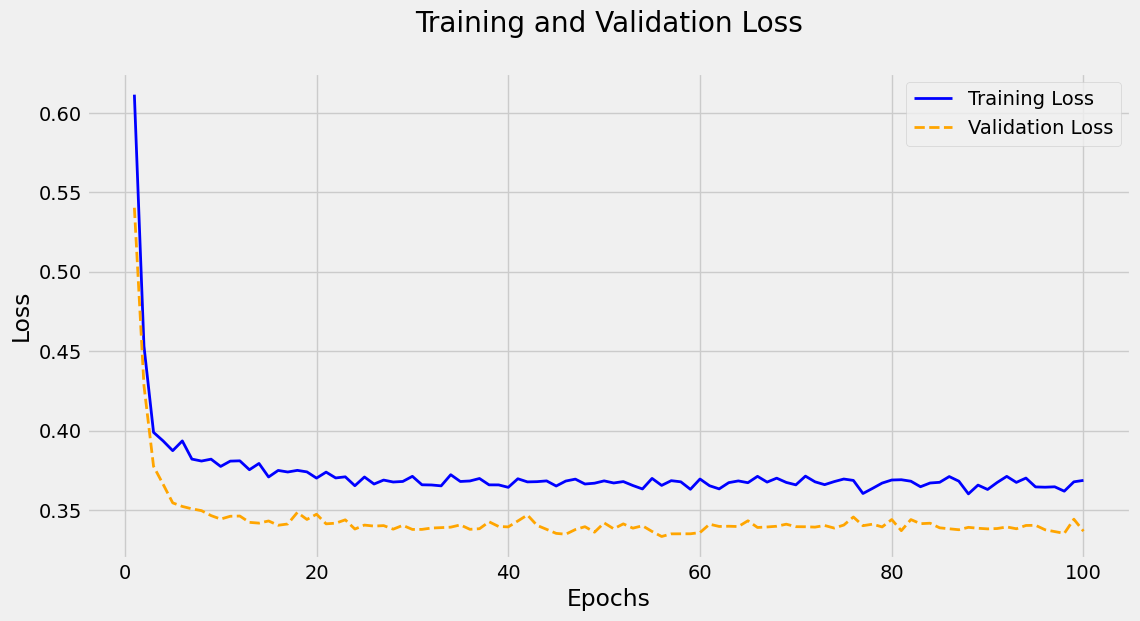

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, 101)


sns.lineplot(x=epoch, y=train_loss, label='Training Loss', linestyle='-', linewidth=2, color='blue')
sns.lineplot(x=epoch, y=val_loss, label='Validation Loss', linestyle='--', linewidth=2, color='orange')

plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Add grid lines for better readability

# You can customize the layout further if needed
plt.show()

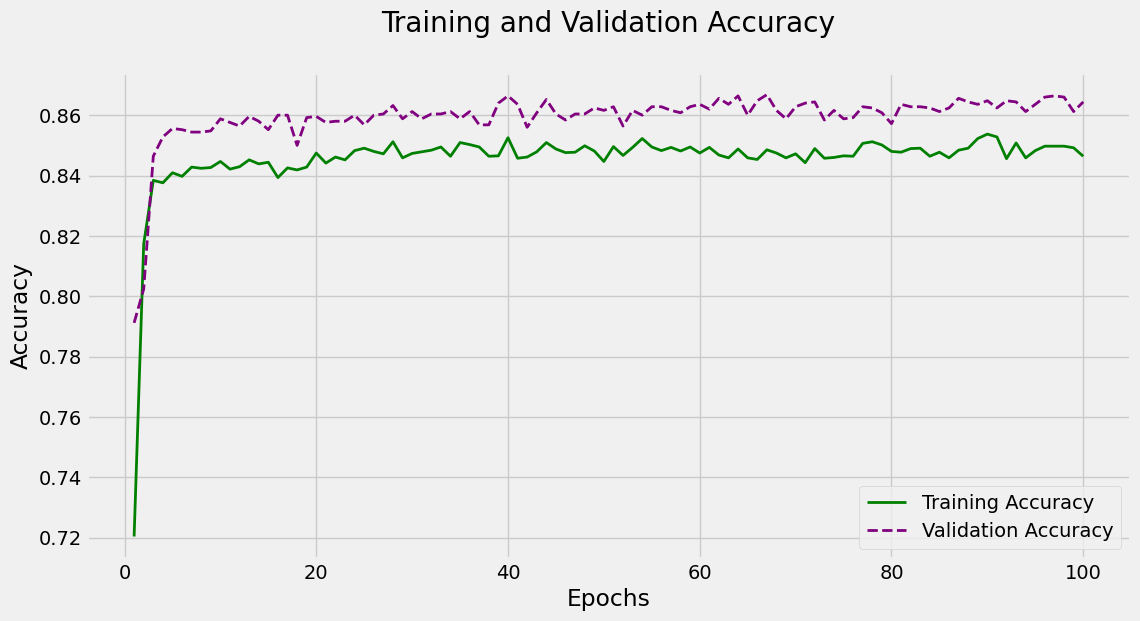

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
epoch = range(1, 101)
sns.lineplot(x=epoch, y=train_accuracy, label='Training Accuracy', linestyle='-', linewidth=2, color='green')
sns.lineplot(x=epoch, y=val_accuracy, label='Validation Accuracy', linestyle='--', linewidth=2, color='purple')

plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Add grid lines for better readability

# You can customize the layout further if needed
plt.show()

In [21]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

79/79 [==============================] - 0s 3ms/step - loss: 0.3366 - accuracy: 0.8644
Accuracy of model is 0.8644000291824341


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 batch_normalization (Batch  (None, 10)                40        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 batch_normalization_1 (Bat  (None, 7)                 28        
 chNormalization)                                       

In [23]:
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.6))
model.add(BatchNormalization())

# adding the third hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.6))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set

model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
235/235 [==============================] - 4s 6ms/step - loss: 0.6411 - accuracy: 0.7449 - val_loss: 0.5782 - val_accuracy: 0.7912
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5184 - accuracy: 0.7856 - val_loss: 0.4689 - val_accuracy: 0.7908
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4758 - accuracy: 0.7973 - val_loss: 0.4431 - val_accuracy: 0.7912
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4711 - accuracy: 0.7953 - val_loss: 0.4483 - val_accuracy: 0.7904
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4713 - accuracy: 0.7964 - val_loss: 0.4480 - val_accuracy: 0.7912
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4685 - accuracy: 0.7976 - val_loss: 0.4475 - val_accuracy: 0.7904
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4687 - accuracy: 0.7971 - val_loss: 0.4399 - val_accuracy: 0.7908

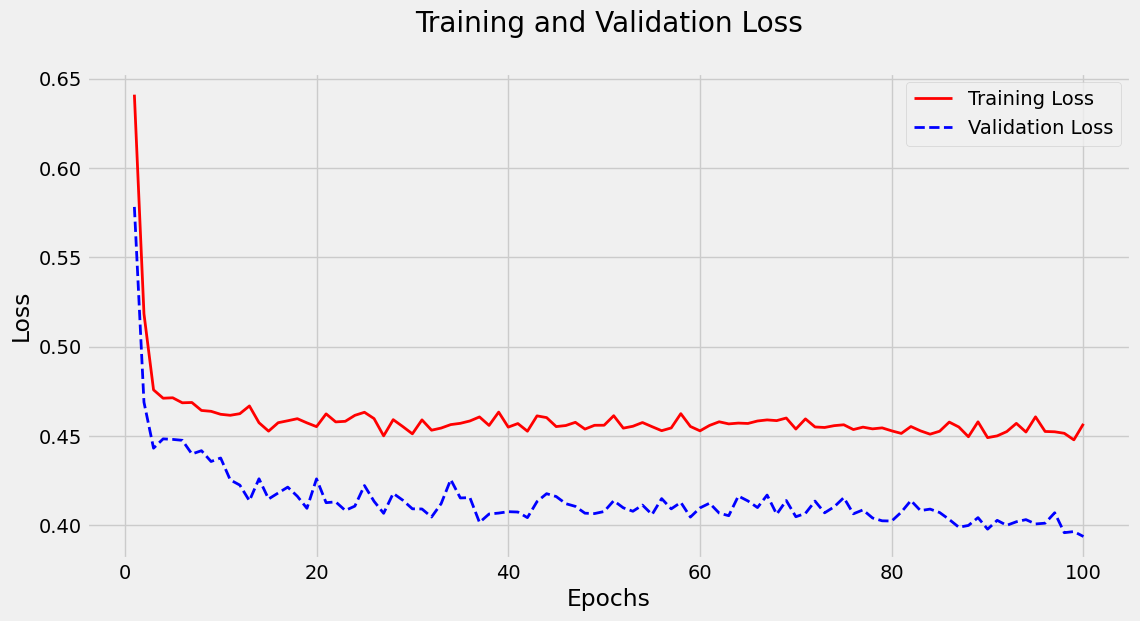

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, 101)
sns.lineplot(x=epoch, y=train_loss, label='Training Loss', linestyle='-', linewidth=2, color='red')
sns.lineplot(x=epoch, y=val_loss, label='Validation Loss', linestyle='--', linewidth=2, color='blue')

plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Add grid lines for better readability

# You can customize the layout further if needed
plt.show()

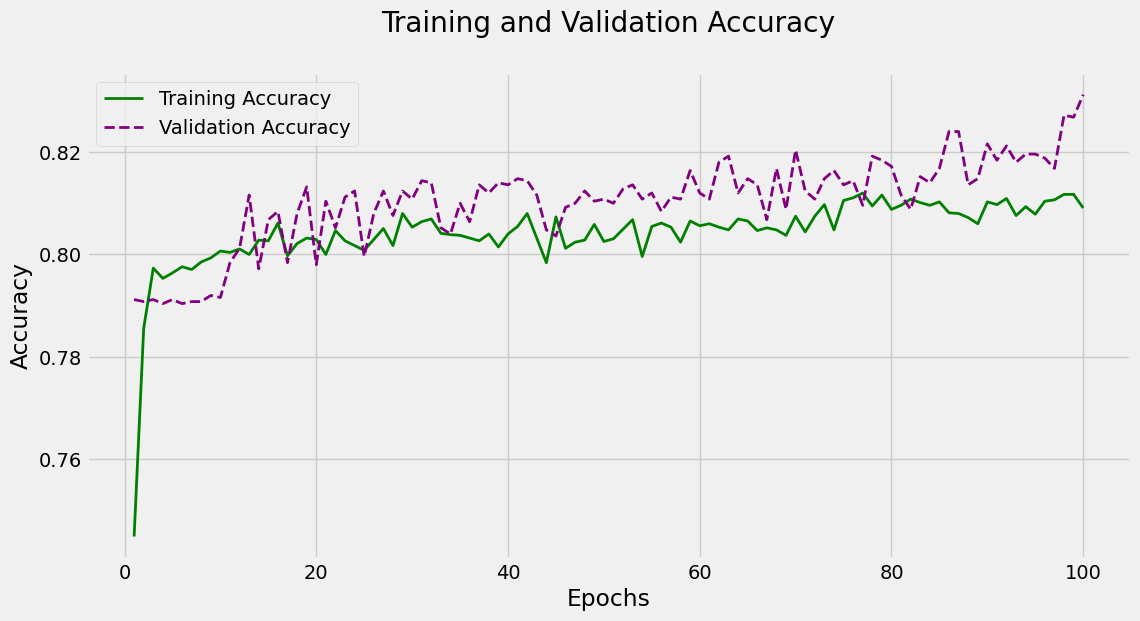

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
epoch = range(1, 101)

sns.lineplot(x=epoch, y=train_accuracy, label='Training Accuracy', linestyle='-', linewidth=2, color='green')
sns.lineplot(x=epoch, y=val_accuracy, label='Validation Accuracy', linestyle='--', linewidth=2, color='purple')

plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Add grid lines for better readability

plt.show()

In [26]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

79/79 [==============================] - 0s 3ms/step - loss: 0.3936 - accuracy: 0.8312
Accuracy of model is 0.8312000036239624


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_2 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 7)                 77        
                                                                 
 dropout_3 (Dropout)         (None, 7)                 0         
                                                                 
 batch_normalization_3 (Bat  (None, 7)                 28        
 chNormalization)                                     